<a href="https://colab.research.google.com/github/Beees835/Deep-Learning/blob/main/FIT5215_Tut_04_BeyondsSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">  FIT3181/5215: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[tran.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">Tutorial 4: Stochastic Gradient Descent and Optimization</span> #
**The purpose of this tutorial is to help you understand and visualize gradients of machine learning algorithms as well as the optimization of deep learning with NumPy. The tutorial consists of two parts:**

I. Visualize the gradient of the training of a logistic regression model on a synthetic dataset.

II. Show the training procedure of a DNN model on the MNIST dataset.

**References and additional reading and resources**
- An overview of gradient descent optimization algorithms ([link](https://ruder.io/optimizing-gradient-descent/)).
- Logistic Regression ([link](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)).
- Automatic Differentiation with `torch.autograd` ([link](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)).


## <span style="color:#0b486b"> I. Visualize the gradient of the training of a logistic regression model on a synthetic dataset </span> <span style="color:red;  font-size: 18px">***** (highly important)</span>

### <span style="color:#0b486b"> I.1 Introduction of logistic regression </span>

Logistic regression can be viewed as a simple neural network for binary classification with the input and output layers.
- The input layer takes inputs as one feature vector (data point, data instance, or data example), mini-batches of feature vectors, or entire dataset of feature vectors.
- The output layer has two neurons and was applied with the `softmax` function to obtain the predicted probability of a given data instance to be over the positive class (i.e, class 1) and the negative class (i.e, class 0).

We choose logistic regression to visually demonstrate the processes of forward/backward propagations and perform Stochastic Gradient Descend (SGD) updates to solve the optimization problem behind logistic regression. This would offer you a better understanding of using forward/backward propagations when training deep neural networks (DNNs). With the implementation in this part, you will enjoy the learning of how to feed a mini-batch to a network, do forward propagation, define the loss function, and then perform backward propagation for computing the gradients for updating the model in an SGD manner.

For the ease of comprehensibility, we present the technical details for the case of a synthetic dataset with two features (i.e., data point $x \in \mathbb{R}^{2}$), meaning that the input layer has two neurons. However, the implementation can be generalized to a general case with many features (i.e., data point $x \in \mathbb{R}^{d}$ where $d$ is the number of features).

The architecture of logistic regression is shown in the following figure.

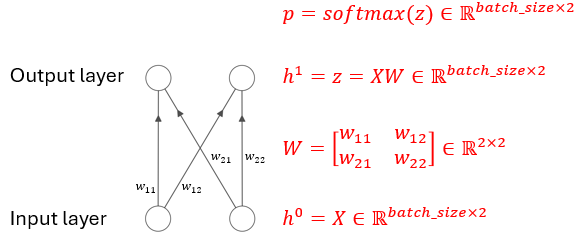

The model parameters of our simple logistic regression include $W=\left[\begin{array}{c}
w_{11} & w_{12}\\
w_{21} & w_{22}
\end{array}\right]\in\mathbb{R}^{2 \times 2}$. Here note that we do not use the bias to simplify the model for the visualizing purpose.

Let us denote the training set as $D=\left\{ (x^{1},y^{1}),(x^{2},y^{2})...,(x^{N},y^{N})\right\}$ where data point and feature vector $x^i = [x^i_1, x^i_2] \in \mathbb{R}^{1\times 2}$ and label $y^i \in \{0,1\}$.

#### <span style="color:#0b486b"> Forward propagation </span>

The computational process of logistic regression for a data point $x \in \mathbb{R}^{1\times 2}$ with the label $y \in \{0,1\}$ is as follows:
- We feed $x \in \mathbb{R}^{1\times2}$ to the logistic regression network.
- We compute: $z= xW \in \mathbb{R}^{1\times 2}$.
- We apply softmax over $z$: $p = softmax(z) \in\mathbb{R}^{1\times 2}$.

$p$ represents the prediction probability over classes 0 and 1. Specifically,  $p = softmax(z) = \left[ \frac{e^{z_0}}{e^{z_0}+e^{z_1}}, \frac{e^{z_1}}{e^{z_0}+e^{z_1}} \right]$.

The loss incurred is as follows:
- $l(x,y;W) = CE(\mathbb{1}_y,p) = -log(p_y))$

Your task is to explain why it is.

The loss incurred by the entire dataset is:
- $l(W,D)=\frac{1}{N}\sum_{i=1}^{N}l(x^{i},y^{i};W)$

To efficiently solve the above optimization problem, we apply SGD in which at each iteration we feed a mini-batch $X$ to the network and then rely on backward propagation to compute the gradient of the loss function w.r.t. to $W$ for the current mini-batch.

The computational process of logistic regression for a mini-batch $X \in \mathbb{R}^{batch\_size\times2}$ with labels $y \in \mathbb{R}^{batch\_size\times1}$ is as follows:
- We feed a mini-batch $X=\left[\begin{array}{cc}
b_{1}^{1} & b_{2}^{1}\\
b_{1}^{2} & b_{2}^{2}\\
... & ...\\
b_{1}^{batch\_size} & b_{2}^{batch\_size}
\end{array}\right]\in\mathbb{R}^{batch\_size\times2}$ of 2D feature vectors (data points) to our logistic regression network.
- We compute $z = XW \in \mathbb{R}^{batch\_size\times 2}$.
- We apply softmax over $z$: $p = softmax(z) \in \mathbb{R}^{batch\_size\times 2}$.

The loss incurred by the current mini-batch is as follows:
- $l(W,X)=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}l(b^{i},y^{i};W)=-\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}-\log p^{i}_{y^i}$ where $p^{i} = softmax(z^i)= \left[ \frac{e^{z^i_0}}{e^{z^i_0}+e^{z^i_1}}, \frac{e^{z^i_1}}{e^{z^i_0}+e^{z^i_1}} \right]$.


#### <span style="color:#0b486b"> Backward propagation </span>

We now compute the gradient of the loss incurred by a mini-batch $l(W,X)$ w.r.t. the model parameter $W$. This can be done conveniently via backward propagation with some matrix multiplications. The mathematical tool for this derivation is the chain rule based on the computational process of the forward propagation.

From the process:
- $z = XW ⟶ p = softmax(z) ⟶ l(W,X)$

We derive as follows:
- $ \frac{\partial l}{\partial W}	=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\frac{\partial l(b^{i},y^{i};W)}{\partial W}=\frac{1}{batch\_size}\sum_{i=1}^{batch\_size}\frac{\partial l(b^{i},y^{i};W)}{\partial z^{i}}\frac{\partial z^{i}}{\partial W}$

where:
- $\frac{\partial l(b^{i},y^{i};W)}{\partial z^{i}} = p^i - 1_{y^i}$
- $\frac{\partial z^{i}}{\partial W} = {b^i}$

Thus:
- $ \frac{\partial l}{\partial W} = \frac{1}{batch\_size}\sum_{i=1}^{batch\_size} {b^i}^T \times (p^i - 1_{y^i})$, where $\times$ denotes the matrix multiplication.

To facilitate the computation, we can rewrite the above derivative in the form of matrix multiplication as follows:
- $\frac{\partial l}{\partial W}=mean\left(b^T \times (p - 1_{y}) \right)\in\mathbb{R}^{2\times 2}$

where $1_y$ is the one-hot transformation of $y$. In case $y \in \{0, 1\} ⟶ 1_y = \left[1-y, y\right]$

#### <span style="color:#0b486b"> SGD update </span>

We update the model based on the gradient of the mini-batch w.r.t. $W$ as:
- $W = W - \eta*\frac{\partial l}{\partial W}$ where $\eta >0$ is the learning rate.

### <span style="color:#0b486b"> I.2 Implementation of logistic regression </span>

#### **<span style="color:#0b486b"> First, we create a simple synthetic dataset for logistic regressions </span>**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy

We would like to generate a few data points on a two-dimensional axis and assume that the optimal coefficient of the logistic regression is known to us.

In [2]:
W_opt = np.array([[1,-1],[2,0]], dtype=np.float64) # the optimal W
b_opt = np.array([1,1], dtype=np.float64) # the optimal b
print(W_opt)
print(b_opt)

[[ 1. -1.]
 [ 2.  0.]]
[1. 1.]


We generate the training set of 2D data points.

In [3]:
# Randomly generate 500 synthetic data points
N = 500
delta = 2
X1 = (np.random.rand(N) -0.5)*2*delta
X2 = (np.random.rand(N) -0.5)*2*delta
X_train = np.array([x for x in zip(X1,X2)])
print("X_train shape: {}".format(X_train.shape))

X_train shape: (500, 2)


We assign labels (i.e., $0$ or $1$) for the data points according to if they stay on what side of the optimal hyperplane (W_opt).

In [4]:
# Generate the labels for those data points
z = X_train.dot(W_opt) + b_opt
z = z + np.random.normal(0, 0.2, size=(N,2)) # add some noise
y_train = (z[:,1] > z[:, 0]).astype(int).reshape(-1)
print("y_train shape: {}".format(y_train.shape))

num_pos = np.sum(y_train==1)
num_neg = np.sum(y_train==0)
print("Number of positive labels: {}, number of negative labels: {}".format(num_pos, num_neg))

y_train shape: (500,)
Number of positive labels: 271, number of negative labels: 229


We now visualize the data points with labels and the optimal decision boundary.

In [5]:
# The following code visualizes the hyperplane, i.e., the decision boundary, which is a line in the two-dimensional case
def visualize_hyperplane(X= None, y= None, W=None, b= None):
    # Plot data points
    X_pos = X[y==1, :]
    X_neg = X[y==0, :]
    plt.scatter(X_pos[:,0], X_pos[:,1], label='1',  c='green', marker='+')
    plt.scatter(X_neg[:,0], X_neg[:,1], label='0', c='blue', marker='_')
    plt.legend(loc='upper right')

    # Plot the decision boundary
    f = lambda x: ((W[0,1]-W[0,0])*x + (b[1]- b[0]))/(W[1,0]-W[1,1])
    X1 = np.linspace(-2,2,500)
    plt.plot(X1, f(X1),  'r--')
    plt.show()

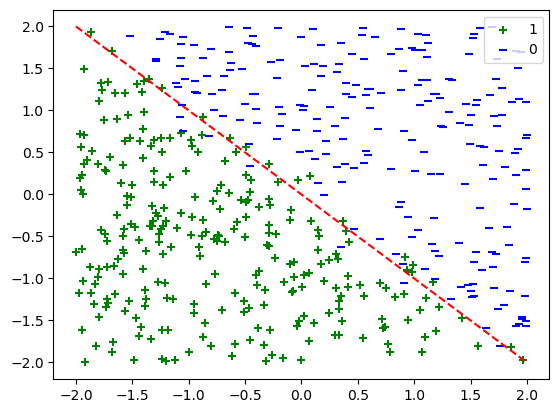

In [6]:
visualize_hyperplane(X_train, y_train, W_opt, b_opt)

In [7]:
from IPython.display import clear_output
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Visualize the hpyterplane and the training loss
W = np.random.randn(2,2)
b = np.random.randn(2)

def visualize_hyperplane_loss(X, y, W, b, losses):
    clear_output(wait=True)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    #plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='bwr', s= 10)
    X_pos = X[y==1, :]
    X_neg = X[y==0, :]
    plt.scatter(X_pos[:,0], X_pos[:,1], label='1',  c='green', marker='+')
    plt.scatter(X_neg[:,0], X_neg[:,1], label='0', c='blue', marker='_')
    plt.xlabel('$x_1$', fontsize=10)
    plt.ylabel('$x_2$', fontsize=10)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title('Decision boundary', fontsize = 15)
    plt.legend(loc='upper right')

    # Corrected function to calculate the decision boundary
    f = lambda x: ((W[0,1]-W[0,0])*x + (b[1]- b[0]))/(W[1,0]-W[1,1])

    #Plot the decision boundary
    X1 = np.linspace(-2,2,500)
    plt.plot(X1, f(X1),  'r--')
    plt.subplot(1,2,2)
    plt.plot(losses, label = 'Epoch loss', marker='o')
    plt.xlabel('Epoch', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.legend()
    plt.show()

#### **<span style="color:#0b486b"> Now we define the logistic regression model </span>**

In [8]:
# Define the softmax function
def softmax(h):
    return np.exp(h)/np.sum(np.exp(h), axis=1, keepdims= True)

Below is the code for forward propagation w.r.t. the mini-batch $X$ or the set of data points $X$.

In [9]:
# Define the logistic regression model and the corresponding loss, which is similar to foward pass in deep neural networks
def forward(X= None, y=None, W= None, b= None, eps= 1E-10):
    eps = 1E-10
    h = X@W + b
    p = softmax(h)
    y = y.reshape(-1,1)
    y_one_hot = np.hstack([1-y, y])
    losses = -np.sum(y_one_hot*np.log(p+eps), axis=1)
    loss = np.mean(losses)
    return (h,p,loss)

Below is the code for backward propagation in which we compute the gradient of the loss of $X$ w.r.t. $W$.

In [10]:
# Compute the gradient of the loss by the chain rule, which is similar to backpropagate in deep neural networks
def grad(X= None, y= None, h= None, p=None, eps= 1E-10):
    batch_size = len(y)
    y = y.reshape(-1,1)
    y_one_hot = np.hstack([1-y, y])
    grad_h = p - y_one_hot
    grad_W = X.transpose().dot(grad_h)*(1.0/batch_size)  #refer to the formula to compute the gradient in Section I
    grad_b = np.sum(grad_h, axis=0)*(1.0/batch_size)
    return grad_W, grad_b

#### **<span style="color:#0b486b"> Here we train our logistic regression model on the synthetic dataset with gradient descent</span>**

We consider three schemes:
- (i) Gradient descent in which we use the entire dataset (i.e., $X$ is the entire dataset) to compute the gradient.
- (ii) SGD in which we use mini-batches to compute gradient for which the mini-batches are uniformly sampled from the training set at each iteration.
- (iii) SGD in which we use mini-batches to compute gradient, but we first shuffle the training set, split the training set into many equal mini-batches (folds) with the same number of data points (i.e., $batch\_size$), and in each iteration we use a mini-batch to feed to the network. Although this mini-batch generating strategy is a bit diverge from the theory of SGD, it always obtains comparable performance compared to (ii), hence widely being used in training deep learning models.

Below is the code for GD in (i).

In [11]:
W = np.random.randn(2,2)
b = np.random.randn(2)
epochs = 30
eta = 0.5
plt.ion()
losses = []
for epoch in range(epochs):
    X = X_train
    y= y_train.reshape(-1,1)
    h, p, loss= forward(X,y, W, b)
    losses.append(loss)
    # Compute gradient
    grad_W, grad_b = grad(X,y,h,p)
    # Update coefficients with gradient descent
    W = W - eta*grad_W
    b = b - eta*grad_b

    # We update the coefficients through all the data points
    visualize_hyperplane_loss(X_train, y_train, W, b, losses)
    plt.pause(0.2)
plt.ioff()

Below is the code for SGD with the strategy in (ii).

In [21]:
plt.ion()
W = np.random.randn(2,2)
b = np.random.randn(2)
epochs =30
eta = 0.5
batch_size = 16
iter_per_epoch = int(N/batch_size)
epoch_losses= []
for epoch in range(epochs):
    losses =[]
    # We update the coefficients in each random batch
    for i in range(iter_per_epoch):
        # randomly sample a batch of data points
        idxs= np.random.choice(np.arange(N), batch_size, replace= False)
        X= X_train[idxs]
        y = y_train[idxs]
        h, p, batch_loss= forward(X,y,W,b)

        losses.append(batch_loss)
        grad_W, grad_b = grad(X,y,h,p)
        W = W - eta*grad_W
        b = b - eta*grad_b
    epoch_losses.append(np.mean(losses))
    visualize_hyperplane_loss(X_train, y_train, W, b, epoch_losses)
    plt.pause(0.2)
plt.ioff()

Below is the code for SGD with the strategy in (iii).

In [13]:
plt.ion()
W = np.random.randn(2,2)
b = np.random.randn(2)
epochs =30
eta = 0.1
batch_size = 16
iter_per_epoch = int(N/batch_size)
epoch_losses =[]
for epoch in range(epochs):
    losses = []
    idx_shuffled = np.random.permutation(N)
    # We update the coefficients in each sequential batch
    for idx_start in range(0, N, batch_size):
        # We go through the batches sequencially, i.e., non-randomly
        idx_end = min(N, idx_start + batch_size)
        idxs = idx_shuffled[idx_start:idx_end]
        X= X_train[idxs]
        y= y_train[idxs]
        h, p, batch_loss= forward(X, y, W, b)

        losses.append(batch_loss)
        grad_W, grad_b = grad(X, y, h, p)
        W = W - eta*grad_W
        b = b - eta*grad_b
    epoch_losses.append(np.mean(losses))
    visualize_hyperplane_loss(X_train, y_train, W, b, epoch_losses)
    plt.pause(0.2)
plt.ioff()

**<span style="color:red">Exercise 1</span>**: Try with smaller learning rates and different initial $W$ to compare the models obtained by three strategies in (i), (ii), and (iii). Report your observations.

**<span style="color:red">Exercise 2</span>**: Implement SGD with momentum (refer [here](https://ruder.io/optimizing-gradient-descent/)) and compare with the standard SGD in terms of the convergence rate to the optimal solution.

## <span style="color:#0b486b"> II. Auto-Grad in PyTorch</span> <span style="color:red;  font-size: 18px">**** (important)</span>

### <span style="color:#0b486b"> II.1 Introduction of AutoGrad in PyTorch </span>

Auto-Grad or Auto-Differentiation is a very essential capability  of PyTorch, enabling the back-propagation to compute the gradients of the loss w.r.t. the model parameters (e.g., the filters of Conv2D layers, the weight matrices, and the biases).

In PyTorch, when declaring a deep model model, we indeed build up a computational graph from the input (e.g., a single data example or a mini-batch of several data examples) to a scalar output (e.g., the loss function).

For example, we consider a linear regression model to predict the score for a feature vector $x = [x_1, x_2, x_3] \in \mathbb{R}^3$. Basically, our model parameters consist of a weight vector $W \in \mathbb{R}^{3 \times 1}$ and a bias $b \in \mathbb{R}$. We evaluate the predicted score as: $\hat{y} = xW +b$. Assuming that the ground-truth score is $y \in \mathbb{R}$, if we are using the least square error, this prediction suffers a loss:

$l = (\hat{y} - y)^2 = (xW +b -y)^2$

We now use the auto-grad to compute the gradient of the L2 loss $l$ w.r.t. the weight vector $W$ and the bias $b$.

In [14]:
import torch

We declare $x$ as a Torch tensor and randomly initialize $W$ and $b$. Please note `requires_grad = True` indicates that we need to compute the gradient of the loss w.r.t. this variable.

For the tensor $W$ and $b$, because their `requires_grad = True`, we store their gradients along with their values. Moreover, we can access the gradient and the value via `W.grad` and `W.data`.

In [15]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
y = torch.tensor([4.0])
W = torch.rand(3,1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

We now compute the predicted score $\hat{y}$ and the L2 loss `l`. Actually, we are defining a computational graph with $x, W, b, \hat{y}, y$ and the loss $l$.

In [16]:
y_hat = torch.matmul(x,W) + b
l = (y_hat - y)**2

We call `l.backward()` to traverse backward the above computational graph to compute the gradients of the loss w.r.t. $W$ and $b$.

In [17]:
l.backward(retain_graph=True)
#l.backward() raises RuntimeError if we try to through the graph a "second time"
#suggests that you might be attempting to call the .backward() function
#on a tensor that has already had its gradients calculated and the underlying computation graph has been freed.
print(f'W_grad = {W.grad}')
print(f'W_value={W.data}')
print(f'b_grad = {b.grad}')
print(f'b_value={b.data}')

W_grad = tensor([[-0.4486],
        [-0.8971],
        [-1.3457]])
W_value=tensor([[0.0218],
        [0.8201],
        [0.4717]])
b_grad = tensor([-0.4486])
b_value=tensor([0.6985])


We print out the `requires_grad` of all relevant variables or tensors. Except the input $x$, other have `requires_grad=True`, indicating that we can traverse backward to compute the gradients of the loss w.r.t. them.

In [18]:
print(l.requires_grad)
print(y_hat.requires_grad)
print(W.requires_grad)
print(b.requires_grad)
print(x.requires_grad)

True
True
True
True
False


In some contexts (e.g., only computing the loss for displaying or evaluating the accuracies), we do not need to compute the gradients. To save up the time and memory, we can

In [19]:
with torch.no_grad():
  l_prime = (y_hat - y)**2
  print(l_prime.requires_grad)

False


We only use `l_prime` for the evaluating purpose. Hence, we cannot do backpropagation from `l_prime`. The following raises a RuntimeError.

In [20]:
l_prime.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### <span style="color:#0b486b"> II.1 Implementing logistic regression using AutoGrad </span>

First, we create a Torch dataset with `X_train` and `y_train`.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

torch.manual_seed(1234)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data, labels):
        super(MyDataset, self).__init__()
        assert data.shape[0] == labels.shape[0]  #assuming shape[0] = dataset size
        self.data = torch.tensor(data, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.float32)

    def __len__(self):
        return self.labels.shape[0]

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
train_dataset = MyDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.W = torch.nn.Parameter(torch.randn(2, 2, requires_grad= True))
        self.b = torch.nn.Parameter(torch.randn(2, requires_grad= True))

    def forward(self, x):
        return torch.matmul(x, self.W) + self.b

    def compute_loss(self, x, y):
        eps = 1E-10
        h = self.forward(x)
        # compute cross-entropy loss manually
        # p = torch.nn.functional.softmax(h, dim=1)
        # losses = -torch.log(p[range(len(y)),y.long()]+eps)
        # loss = torch.mean(losses)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(h, y.long().squeeze())
        return loss

    def update_SGD(self, x, y, eta):
        loss = self.compute_loss(x, y)
        loss.backward()
        self.W.data = self.W.data - eta*self.W.grad
        self.b.data = self.b.data - eta*self.b.grad
        if self.W.grad is not None:
          self.W.grad.zero_()
        if self.b.grad is not None:
          self.b.grad.zero_()

    def fit(self, train_loader, epochs, eta):
        plt.ion()
        losses = []
        for epoch in range(epochs):
          for x, y in train_loader:
              self.update_SGD(x, y, eta)
          train_loss = self.compute_loss(train_dataset.data, train_dataset.labels).detach().numpy()
          losses.append(train_loss)
          visualize_hyperplane_loss(X_train, y_train, self.W.data, self.b.data, losses)
          plt.pause(0.5)
        plt.ioff()


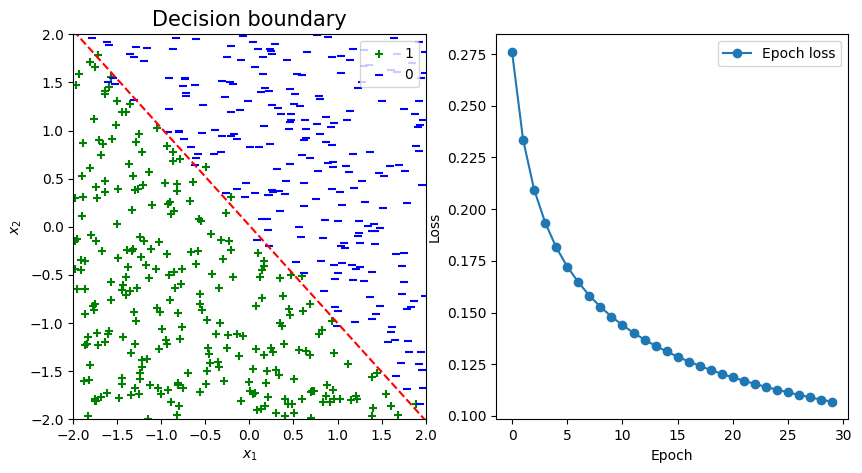

In [ ]:
lg = LogisticRegression()
lg.fit(train_loader, epochs=30, eta=0.1)

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>